In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, timedelta

In [2]:
today = str(date.today())
data = pd.read_excel("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-" + today + ".xlsx")

In [3]:
data = data.sort_values(["countriesAndTerritories", "dateRep"])

In [4]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
83,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
82,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
81,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
80,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
79,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8295,2020-03-29,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
8294,2020-03-30,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8293,2020-03-31,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8292,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


# Computing cumulative values

In [5]:
data["Cumul Cases"] = data.groupby("countriesAndTerritories")["cases"].cumsum()

In [6]:
data["Cumul Deaths"] = data.groupby("countriesAndTerritories")["deaths"].cumsum()

In [7]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,Cumul Cases,Cumul Deaths
83,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0,0,0
82,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
81,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
80,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
79,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8295,2020-03-29,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,7,1
8294,2020-03-30,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,7,1
8293,2020-03-31,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,7,1
8292,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,8,1


In [ ]:
#data = data[["DateRep", "Countries and territories", "Cumul Cases", "Cumul Deaths"]]

# Computing percentage changes

In [8]:
data["Cases Change"] = data.groupby("countriesAndTerritories")["Cumul Cases"].pct_change()

In [9]:
data["Deaths Change"] = data.groupby("countriesAndTerritories")["Cumul Deaths"].pct_change()

# Eliminiating dates with fewer then 10 deaths (new table)

In [10]:
dataDeaths = data[data["Cumul Deaths"] >= 50]

In [11]:
dataDeaths["Days after D50"] = dataDeaths.groupby("countriesAndTerritories")["countriesAndTerritories"].transform(lambda x: np.arange(len(x)))

/Users/wassim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
dataDeaths.groupby("countriesAndTerritories")["Days after D50"].max().sort_values()

countriesAndTerritories
Algeria                      0
India                        0
Greece                       0
Romania                      1
Dominican_Republic           1
Iraq                         1
Ireland                      2
Ecuador                      3
Japan                        4
Canada                       5
Philippines                  5
Denmark                      5
Sweden                       6
Austria                      6
Portugal                     6
Turkey                       7
Brazil                       7
Indonesia                    8
Belgium                     11
Germany                     11
Switzerland                 11
Netherlands                 14
United_Kingdom              16
United_States_of_America    18
Spain                       20
France                      20
South_Korea                 25
Italy                       30
Iran                        31
China                       67
Name: Days after D50, dtype: int64

# Countries comparison

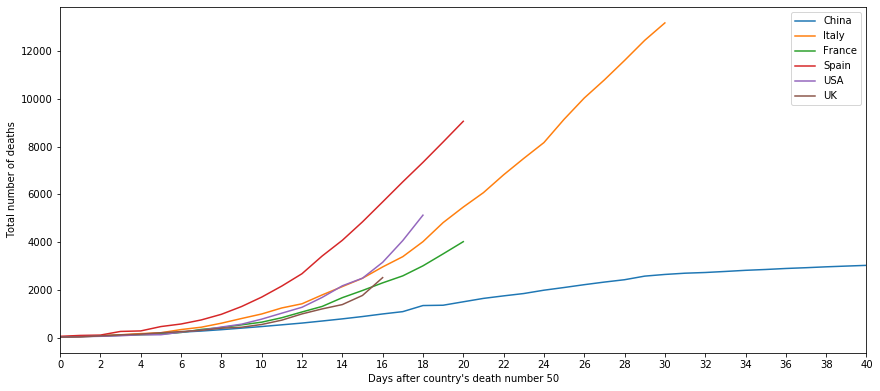

In [13]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#China
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "China"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "China"]["Cumul Deaths"], label="China")

#Italy
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "Italy"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "Italy"]["Cumul Deaths"], label="Italy")

#France
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "France"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "France"]["Cumul Deaths"], label="France")

#Spain
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "Spain"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "Spain"]["Cumul Deaths"], label="Spain")

#United States of America
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "United_States_of_America"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "United_States_of_America"]["Cumul Deaths"], label="USA")

#United Kingdom
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "United_Kingdom"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "United_Kingdom"]["Cumul Deaths"], label="UK")

#Morocco
#ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "Morocco"]["Days after D10"], dataDeaths[dataDeaths["countriesAndTerritories"] == "Morocco"]["Cumul Deaths"], label="Morocco")


plt.xticks(np.arange(0, 41, step=2))
plt.xlim((0,40))

plt.ylabel("Total number of deaths")
plt.xlabel("Days after country's death number 50")

#ax.plot(x, x**3, label="x**3")
ax.legend()

# Italy

In [14]:
dataDeaths[dataDeaths["countriesAndTerritories"] == "Italy"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change,Days after D50
4054,2020-03-03,3,3,2020,146,17,Italy,IT,ITA,60431283.0,1835,52,0.086442,0.485714,0
4053,2020-03-04,4,3,2020,667,28,Italy,IT,ITA,60431283.0,2502,80,0.363488,0.538462,1
4052,2020-03-05,5,3,2020,587,27,Italy,IT,ITA,60431283.0,3089,107,0.234612,0.337500,2
4051,2020-03-06,6,3,2020,769,41,Italy,IT,ITA,60431283.0,3858,148,0.248948,0.383178,3
4050,2020-03-07,7,3,2020,778,49,Italy,IT,ITA,60431283.0,4636,197,0.201659,0.331081,4
4049,2020-03-08,8,3,2020,1247,36,Italy,IT,ITA,60431283.0,5883,233,0.268982,0.182741,5
4048,2020-03-09,9,3,2020,1492,133,Italy,IT,ITA,60431283.0,7375,366,0.253612,0.570815,6
4047,2020-03-10,10,3,2020,1797,98,Italy,IT,ITA,60431283.0,9172,464,0.243661,0.267760,7
4046,2020-03-11,11,3,2020,977,167,Italy,IT,ITA,60431283.0,10149,631,0.106520,0.359914,8
4045,2020-03-12,12,3,2020,2313,196,Italy,IT,ITA,60431283.0,12462,827,0.227904,0.310618,9


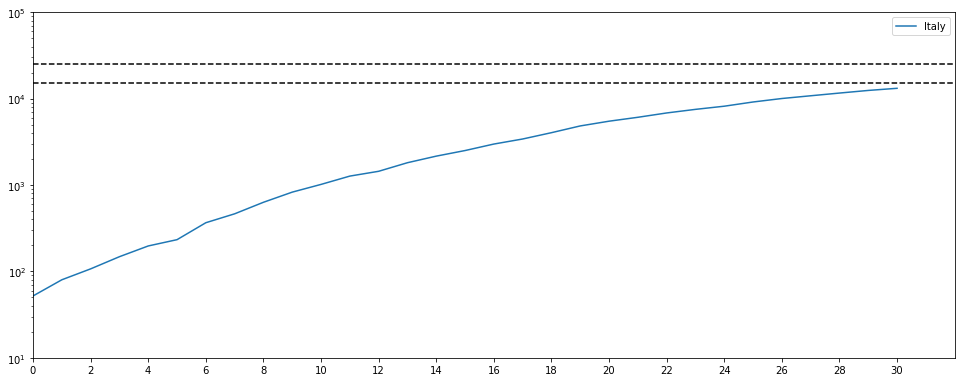

In [15]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Italy
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "Italy"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "Italy"]["Cumul Deaths"], label="Italy")
ax.set_yscale("log")

plt.xlim((0,32))
plt.ylim((10,100000))
plt.xticks(np.arange(0, 32, step=2))

plt.hlines(15000, 0, 32, linestyles="dashed")
plt.hlines(25000, 0, 32, linestyles="dashed")


#ax.plot(x, x**3, label="x**3")
ax.legend()

# Spain

In [16]:
dataDeaths[dataDeaths["countriesAndTerritories"] == "Spain"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change,Days after D50
7118,2020-03-13,13,3,2020,864,37,Spain,ES,ESP,46723749.0,3004,84,0.403738,0.787234,0
7117,2020-03-14,14,3,2020,1227,37,Spain,ES,ESP,46723749.0,4231,121,0.408455,0.440476,1
7116,2020-03-15,15,3,2020,1522,15,Spain,ES,ESP,46723749.0,5753,136,0.359726,0.123967,2
7115,2020-03-16,16,3,2020,2000,152,Spain,ES,ESP,46723749.0,7753,288,0.347645,1.117647,3
7114,2020-03-17,17,3,2020,1438,21,Spain,ES,ESP,46723749.0,9191,309,0.185477,0.072917,4
7113,2020-03-18,18,3,2020,1987,182,Spain,ES,ESP,46723749.0,11178,491,0.216190,0.588997,5
7112,2020-03-19,19,3,2020,2538,107,Spain,ES,ESP,46723749.0,13716,598,0.227053,0.217923,6
7111,2020-03-20,20,3,2020,3431,169,Spain,ES,ESP,46723749.0,17147,767,0.250146,0.282609,7
7110,2020-03-21,21,3,2020,2833,235,Spain,ES,ESP,46723749.0,19980,1002,0.165218,0.306389,8
7109,2020-03-22,22,3,2020,4946,324,Spain,ES,ESP,46723749.0,24926,1326,0.247548,0.323353,9


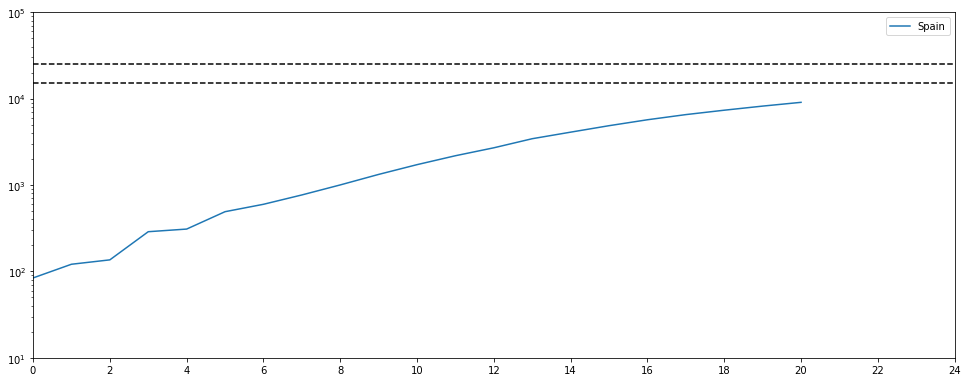

In [17]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Italy
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "Spain"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "Spain"]["Cumul Deaths"], label="Spain")
ax.set_yscale("log")

plt.xlim((0,18))
plt.ylim((10,100000))
plt.xticks(np.arange(0, 25, step=2))

plt.hlines(15000, 0, 30, linestyles="dashed")
plt.hlines(25000, 0, 30, linestyles="dashed")

#ax.plot(x, x**3, label="x**3")
ax.legend()

# France

In [18]:
dataDeaths[dataDeaths["countriesAndTerritories"] == "France"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change,Days after D50
2733,2020-03-13,13,3,2020,595,13,France,FR,FRA,66987244.0,2876,61,0.260851,0.270833,0
2732,2020-03-14,14,3,2020,785,18,France,FR,FRA,66987244.0,3661,79,0.272949,0.295082,1
2731,2020-03-15,15,3,2020,838,12,France,FR,FRA,66987244.0,4499,91,0.228899,0.151899,2
2730,2020-03-16,16,3,2020,924,36,France,FR,FRA,66987244.0,5423,127,0.205379,0.395604,3
2729,2020-03-17,17,3,2020,1210,21,France,FR,FRA,66987244.0,6633,148,0.223124,0.165354,4
2728,2020-03-18,18,3,2020,1097,27,France,FR,FRA,66987244.0,7730,175,0.165385,0.182432,5
2727,2020-03-19,19,3,2020,1404,69,France,FR,FRA,66987244.0,9134,244,0.181630,0.394286,6
2726,2020-03-20,20,3,2020,1861,128,France,FR,FRA,66987244.0,10995,372,0.203744,0.524590,7
2725,2020-03-21,21,3,2020,1617,78,France,FR,FRA,66987244.0,12612,450,0.147067,0.209677,8
2724,2020-03-22,22,3,2020,1847,112,France,FR,FRA,66987244.0,14459,562,0.146448,0.248889,9


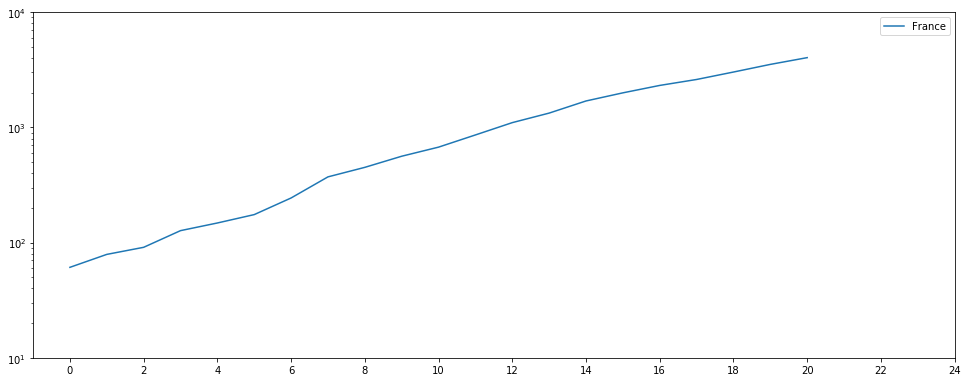

In [19]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Italy
ax.plot(dataDeaths[dataDeaths["countriesAndTerritories"] == "France"]["Days after D50"], dataDeaths[dataDeaths["countriesAndTerritories"] == "France"]["Cumul Deaths"], label="France")
ax.set_yscale("log")

plt.ylim((10,10000))
plt.xticks(np.arange(0, 25, step=2))

#ax.plot(x, x**3, label="x**3")
ax.legend()

# Morocco

In [20]:
data[data["countriesAndTerritories"] == "Morocco"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change
5234,2020-03-03,3,3,2020,1,0,Morocco,MA,MAR,36029138.0,1,0,NaN,NaN
5233,2020-03-06,6,3,2020,1,0,Morocco,MA,MAR,36029138.0,2,0,1.000000,NaN
5232,2020-03-12,12,3,2020,3,1,Morocco,MA,MAR,36029138.0,5,1,1.500000,inf
5231,2020-03-13,13,3,2020,1,0,Morocco,MA,MAR,36029138.0,6,1,0.200000,0.000000
5230,2020-03-14,14,3,2020,1,0,Morocco,MA,MAR,36029138.0,7,1,0.166667,0.000000
5229,2020-03-15,15,3,2020,11,0,Morocco,MA,MAR,36029138.0,18,1,1.571429,0.000000
5228,2020-03-16,16,3,2020,10,0,Morocco,MA,MAR,36029138.0,28,1,0.555556,0.000000
5227,2020-03-17,17,3,2020,9,0,Morocco,MA,MAR,36029138.0,37,1,0.321429,0.000000
5226,2020-03-18,18,3,2020,7,1,Morocco,MA,MAR,36029138.0,44,2,0.189189,1.000000
5225,2020-03-19,19,3,2020,10,0,Morocco,MA,MAR,36029138.0,54,2,0.227273,0.000000


/Users/wassim/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


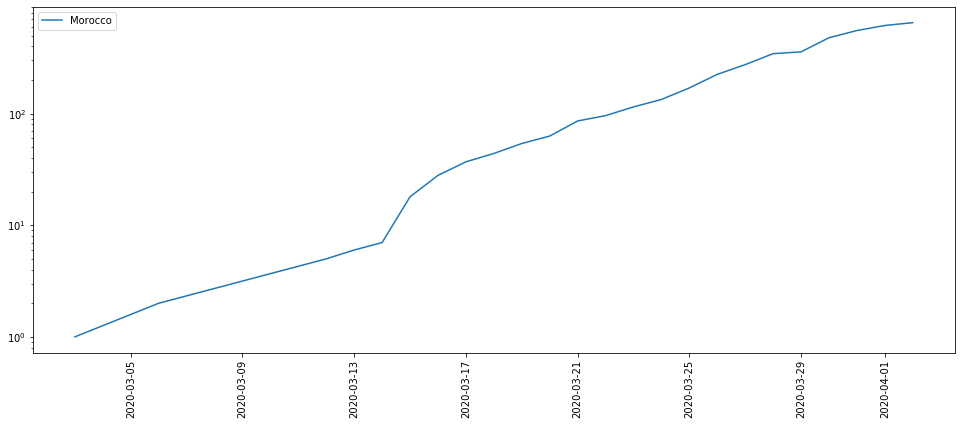

In [21]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Morocco
ax.plot(data[data["countriesAndTerritories"] == "Morocco"]["dateRep"], data[data["countriesAndTerritories"] == "Morocco"]["Cumul Cases"], label="Morocco")
ax.set_yscale("log")

plt.xticks(rotation='vertical')

#ax.plot(x, x**3, label="x**3")
ax.legend()